In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
mpl.rc('font', family='Latin Modern Sans')
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

folder_save = "/Users/mnaegel/Documents/RL_opt/Figures_rlopt/"
font = {"fontname": "Latin Modern Sans", "fontsize":10}
font_legend = {"size": 10}
blue = "#00A2FF"
orange="#F27200"
green="#1DB100"
red="#EE220C"

In [3]:
size_list = [3, 4, 5]


typ = 'min'

eval_rew_min = []
final_rews_min = []
losses_min = []


for size in size_list:

    data_folder = f'data_{size}'

    with open(data_folder + f'/eval_rews_{typ}_True.npy', 'rb') as f:
        eval_rew_min.append(np.load(f))
    with open(data_folder + f'/final_rews_{typ}_True.npy', 'rb') as f:
        final_rews_min.append(np.load(f))   
    with open(data_folder + f'/losses_{typ}_True.npy', 'rb') as f:
        losses_min.append(np.load(f))


typ = 'ncmdp'

eval_rew_ncmdp = []
final_rews_ncmdp = []
losses_ncmdp = []

for size in size_list:

    data_folder = f'data_{size}'

    with open(data_folder + f'/eval_rews_{typ}_True.npy', 'rb') as f:
        eval_rew_ncmdp.append(np.load(f))
    with open(data_folder + f'/final_rews_{typ}_True.npy', 'rb') as f:
        final_rews_ncmdp.append(np.load(f))   
    with open(data_folder + f'/losses_{typ}_True.npy', 'rb') as f:
        losses_ncmdp.append(np.load(f))

In [4]:
eval_rew_min_mean = np.mean(eval_rew_min, axis=(-1, -2))
eval_rew_min_std = np.std(np.mean(eval_rew_min, axis=-1), axis=-1)

eval_rew_ncmdp_mean = np.mean(eval_rew_ncmdp, axis=(-1, -2))
eval_rew_ncmdp_std = np.std(np.mean(eval_rew_ncmdp, axis=-1), axis=-1)


final_rews_min_mean = np.mean(final_rews_min, axis=-1)
final_rews_min_std = np.std(final_rews_min, axis=-1)

final_rews_ncmdp_mean = np.mean(final_rews_ncmdp, axis=-1)
final_rews_ncmdp_std = np.std(final_rews_ncmdp, axis=-1)

losses_min_mean = np.mean(losses_min, axis=-2)
losses_min_std = np.std(losses_min, axis=-2)

losses_ncmdp_mean = np.mean(losses_ncmdp, axis=-2)
losses_ncmdp_std = np.std(losses_ncmdp, axis=-2)

In [5]:
eval_rew_ncmdp_std.shape

(3, 10)

In [6]:
orange = "#F27200"
blue = "#00A2FF"

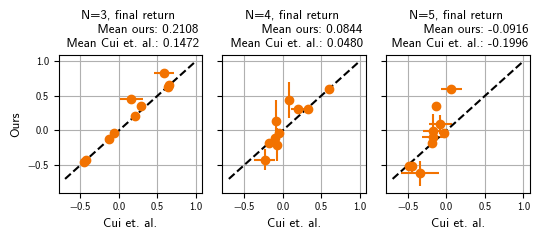

In [7]:
fig, axs = plt.subplots(1, 3, sharey=True, sharex=True, figsize=(5.5,2.5))
for i, N in enumerate(size_list):
    axs[i].errorbar(final_rews_min_mean[i], final_rews_ncmdp_mean[i], 
        xerr=final_rews_min_std[i], yerr=final_rews_ncmdp_std[i],
        fmt='o', color=orange)
    axs[i].plot([-0.7, 1], [-0.7, 1], color='black', linestyle='--')
    axs[i].set_title(f'N={N}, final return \n         Mean ours: {np.mean(final_rews_ncmdp_mean[i]):.4f} \n Mean Cui et. al.: {np.mean(final_rews_min_mean[i]):.4f}',
                     fontdict=font)
    axs[i].set_xlabel('Cui et. al.', fontdict=font)
    axs[i].grid()
    axs[i].tick_params(labelsize=8)
axs[0].set_ylabel('Ours', fontdict=font)
fig.set_tight_layout(True)

fig.savefig(folder_save + 'final_rews_cui_vs_us.pdf', bbox_inches='tight')

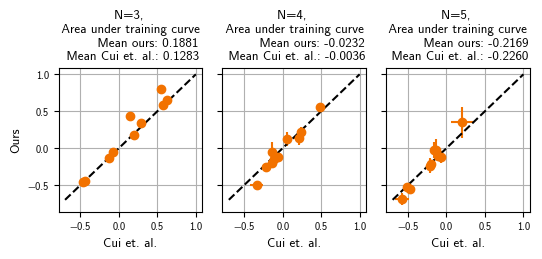

In [8]:
fig, axs = plt.subplots(1, 3, sharey=True, sharex=True, figsize=(5.5,2.7))
for i, N in enumerate(size_list):
    axs[i].errorbar(eval_rew_min_mean[i], eval_rew_ncmdp_mean[i], 
        xerr=eval_rew_min_std[i], yerr=eval_rew_ncmdp_std[i],
        fmt='o', color=orange)
    axs[i].plot([-0.7, 1], [-0.7, 1], color='black', linestyle='--')
    axs[i].set_title(f'N={N}, \n Area under training curve \n         Mean ours: {np.mean(eval_rew_ncmdp_mean[i]):.4f} \n Mean Cui et. al.: {np.mean(eval_rew_min_mean[i]):.4f}',
                     fontdict=font)
    axs[i].set_xlabel('Cui et. al.', fontdict=font)
    axs[i].grid()
    axs[i].tick_params(labelsize=8)
axs[0].set_ylabel('Ours', fontdict=font)
fig.set_tight_layout(True)
fig.savefig(folder_save + 'auc_cui_vs_us.pdf', bbox_inches='tight')

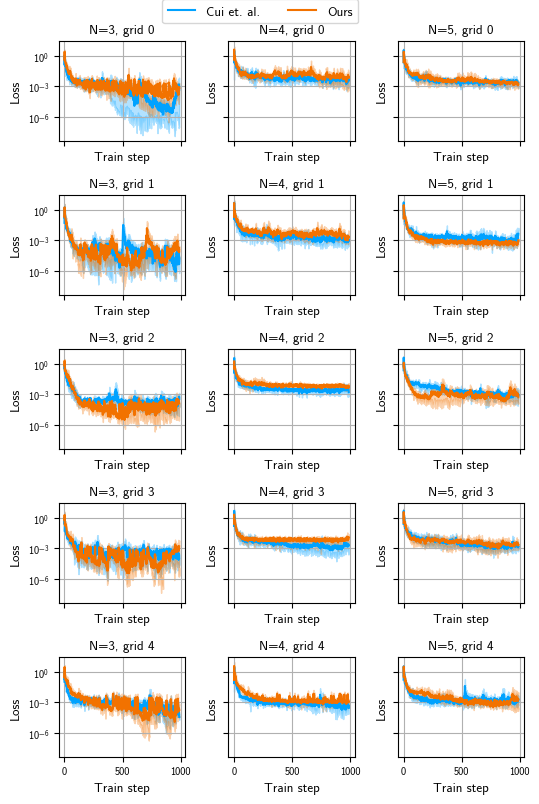

In [9]:
fig, axs = plt.subplots(5,3,figsize=(5.5,8), sharey=True, sharex=True)
# fig.suptitle("Training Lunar Lander MAXPPO", font="Latin Modern Sans")
for a, row in enumerate(axs):
    for b, ax in enumerate(row):
        i = b
        j = a
        ax = axs[j, i]
        ax.plot(losses_min_mean[i, j], label='Cui et. al.', color=blue)
        x_axis = np.arange(len(losses_min_mean[i, j]))
        ax.fill_between(x_axis, 
                        np.min(losses_min[i][j], axis=0), 
                        np.max(losses_min[i][j], axis=0), alpha=0.3, color=blue)
        
        ax.plot(losses_ncmdp_mean[i, j], label='Ours', color=orange)
        ax.fill_between(x_axis, 
                        np.min(losses_ncmdp[i][j], axis=0), 
                        np.max(losses_ncmdp[i][j], axis=0), alpha=0.3, color=orange)
        ax.set_yscale('log')
        ax.grid()
        ax.tick_params(labelsize=8)
        ax.set_title(f'N={size_list[i]}, grid {j}', fontdict=font)
        ax.set_xlabel('Train step', fontdict=font)
        ax.set_ylabel('Loss', fontdict=font)
#axs[0, 1].legend(prop=font_legend, ncols=2, loc=(0.3, 0.97))
lines, labels= ax.get_legend_handles_labels()
fig.legend(lines, labels, ncols=2, prop=font_legend, loc=(0.3, 0.97))
fig.tight_layout()
fig.savefig(folder_save + 'losses_cui_vs_us.pdf', bbox_inches='tight')        